# Ensemble Learning and Random Forests

Suppose you ask 1000 person question, then aggregate their answers. In many cases you will find that this aggregated answer is better than an expert’s answer. This what happen when you trying to aggregate different classifer and predict the same instance from these different classifer then take the majority vote.

Suppose you have trained a few classifiers, each one achieving about 80% accuracy. You may have a Logistic Regression classifier, and SVM classifier, a Random Forest classifier, a K-Nearest Neighbors classifier, and perhaps a few more.

<img src="2.png">

A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes

<img src="1.png">

You can use this **Ensemble** with the same model as weel as with different models but the best is to trying different models because the error will slightly different for model to the other one,  although of that same errors will be common for some models.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline

In [2]:
X, y = make_moons(n_samples=1000, noise=.9)
print(X.shape)
y = y.reshape(-1,1)
print(y.shape)

(1000, 2)
(1000, 1)


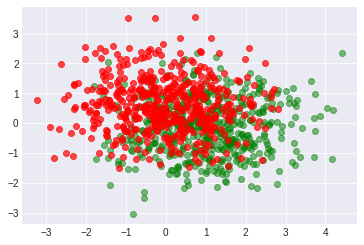

In [3]:
plt.style.use(['seaborn-darkgrid'])

post_insts_x1 = X[np.array(np.where([y==1]))[1], 0]
post_insts_x2 = X[np.array(np.where([y==1]))[1], 1]

neg_insts_x1 = X[np.array(np.where([y==0]))[1], 0]
neg_insts_x2 = X[np.array(np.where([y==0]))[1], 1]

plt.scatter(x=post_insts_x1, y=post_insts_x2, alpha=.5, c='green')
plt.scatter(x=neg_insts_x1, y=neg_insts_x2, alpha=.7, c='red')

In [4]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

In [5]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X, y)

/home/abdelrahman/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))])

In [6]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(clf.__class__.__name__, accuracy_score(y, y_pred))

/home/abdelrahman/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/abdelrahman/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


LogisticRegression 0.726
RandomForestClassifier 1.0


/home/abdelrahman/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC 0.729


/home/abdelrahman/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingClassifier 0.737


In [7]:
log_clf2 = LogisticRegression()
rnd_clf2 = RandomForestClassifier()
svm_clf2 = SVC(probability=True)

In [8]:
voting_clf2 = VotingClassifier(
    estimators=[('lr', log_clf2), ('rf', rnd_clf2), ('svc', svm_clf2)],
    voting='soft')
voting_clf2.fit(X, y)

/home/abdelrahman/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [9]:
# Instead of that we can use voting_clf2 dierctly
log_clf2.fit(X, y)
y_pred_1 = log_clf2.predict_proba(X)[:, 1].reshape(-1,1)

rnd_clf2.fit(X, y)
y_pred_2 = rnd_clf2.predict_proba(X)[:, 1].reshape(-1,1)

svm_clf2.fit(X, y)
y_pred_3 = svm_clf2.predict_proba(X)[:, 1].reshape(-1,1)


voting_clf2.fit(X, y)
y_pred_4 = np.round(voting_clf2.predict_proba(X)[:, 1].reshape(-1, 1)).astype(int)

overall_prob = np.concatenate((y_pred_1, y_pred_2, y_pred_3), axis=1)
overall_prob = np.sum(overall_prob ,axis=1)/3
overall_prob = overall_prob.reshape(-1, 1)
overall_prob = np.round(overall_prob).astype(int)


overall_prob
print(overall_prob.shape)
overall_prob[:3]

/home/abdelrahman/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/abdelrahman/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/home/abdelrahman/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/abdelrahman/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

(1000, 1)


array([[1],
       [0],
       [1]])

In [11]:
print("Soft Vote", accuracy_score(y, overall_prob))

Soft Vote 0.824


In [12]:
print("Ensure Soft Vote Result", accuracy_score(y, y_pred_4))

Soft Vote 0.823


# Note !

If all classifiers are able to estimate class probabilities (i.e., they have a predict_proba()  method),  then  you  can  tell  Scikit-Learn  to  predict  the  class  with  the highest class probability, averaged over all the individual classifiers. This is called soft voting,   It  often  achieves  higher  performance  than  hard  voting  because  it  gives  more weight  to  highly  confident  votes.  All  you  need  to  do  is  replace  voting="hard"  with voting="soft"  and  ensure  that  all  classifiers  can  estimate  class  probabilities.

# Bagging and Pasting

We have trained different model using Voting Classifer. But another approach is to train the same model different times on different subsets of the orginal data. **This is called Baggin & Pasting**.

The difference is that 
- When sampling is performed with replacement is called Baggin (bootstrap aggregating)
- When sampling is performed without replacement is called Pasting

All of these method can be trained in parallel, via different CPU cores or even different servers.

# Note !

The BaggingClassifier automatically performs soft voting instead of hard voting if the base classifier can estimate class probabilities.

In [ ]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X, y)
y_pred = bag_clf.predict(X)


In [ ]:
print("Soft Vote", accuracy_score(y, y_pred))

# Out-Of-Bag  Evaluation

"With bagging, some instances may be sampled several times for any given predictor, while others may not be sampled at all. By default a Bagging Classifier samples m training instances with replacement (bootstrap=True), where m is the size of the training set. This means that only about 63% of the training instances are sampled on average for each predictor.6 The remaining 37% of the training instances that are not sampled are called out-of-bag (oob) instances. Note that they are not the same 37% for all predictors."



In [ ]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X, y)
print(bag_clf.oob_score_)
y_pred = bag_clf.predict(X)


In [ ]:
print("Soft Vote with Baggin Classifier", accuracy_score(y, y_pred))

# Boosting

We have trained different models or even the same model, but all of the previous methods was in parallel, and you can run on different CPUs, or server.

But another approach is to run these models sequentially **one after another**.

How it works ? each model trained, then it evaluated on the training set, then update the weights that related to instances the model predict wrong, then use these updated weights with the new model and doing the same process till you reach last predictor.

But this method of ensemble does not scale or run on different CPUs, as you can see its sequential method, and in the prediction it work as any method before take the majority of vote to be your answer.

<img src="12.png">

One of the most used of this method is **AdaBoost (Adaptive Boosting)**

"Scikit-Learn actually uses a multiclass version of AdaBoost called SAMME16 (which
stands for Stagewise Additive Modeling using a Multiclass Exponential loss function).
When there are just two classes, SAMME is equivalent to AdaBoost. Moreover, if the
predictors can estimate class probabilities (i.e., if they have a predict_proba()
method), Scikit-Learn can use a variant of SAMME called SAMME.R (the R stands
for “Real”), which relies on class probabilities rather than predictions and generally
performs better."

In [ ]:
ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=1), n_estimators=200,
 algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X, y)

In [ ]:
y_pred = ada_clf.predict(X)
print(accuracy_score(y, y_pred))